# Check Image Sizes and Aspect-Ratios of Cropped Dataset

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
from importlib import reload
import helper as h
reload(h);

In [3]:
DATA_DIR = './Data/XRay_/'
TEST_DIR = 'test/'
TRAIN_DIR = 'train/'

In [4]:
classes = os.listdir(DATA_DIR + TRAIN_DIR)
train_files = []
for klass in classes:
    class_files = [DATA_DIR + TRAIN_DIR + klass + os.sep + fname
                   for fname in os.listdir(DATA_DIR + TRAIN_DIR + klass)]
    print(f'{klass}: {len(class_files)}')
    train_files.extend(class_files)
len(train_files)

NORMAL: 1349
PNEUMONIA: 3883


5232

In [5]:
classes = os.listdir(DATA_DIR + TEST_DIR)
test_files = []
for klass in classes:
    class_files = [DATA_DIR + TEST_DIR + klass + os.sep + fname
                   for fname in os.listdir(DATA_DIR + TEST_DIR + klass)]
    print(f'{klass}: {len(class_files)}')
    test_files.extend(class_files)
len(test_files)

NORMAL: 234
PNEUMONIA: 389


623

In [6]:
def check_files(fpaths, check_jfif=False):
    counter = Counter()
    ars = []
    heights = []
    widths = []
    for fpath in fpaths:
        if check_jfif:
            try:
                f = open(fpath, 'rb')
                assert b'JFIF' in f.peek(10)
            except:
                print(fpath)
            f.close()

        img = plt.imread(fpath)
        counter.update((img.shape,))
        ars.append(img.shape[0] / img.shape[1])
        heights.append(img.shape[0])
        widths.append(img.shape[1])
        
        if len(img.shape) != 2:
            assert len(img.shape) == 3
            assert img.shape[2] == 3
            assert np.all(img[..., 0] == img[..., 1])
            assert np.all(img[..., 0] == img[..., 2])
    
    max_wh, min_wh = 0, 100000
    for k in counter:
        h, w = k[:2]
        if h > max_wh: max_wh = h
        if h < min_wh: min_wh = h
        if w > max_wh: max_wh = w
        if w < min_wh: min_wh = w
    print(f'Max_W|H: {max_wh}, Min_W|H: {min_wh}')
    
    return counter, sorted(ars), sorted(heights), sorted(widths)

In [7]:
def check_files_ar(fpaths, min_ar, max_ar):
    min_files, max_files = [], []
    for fpath in fpaths:
        img = plt.imread(fpath)
        ar = img.shape[0] / img.shape[1]
        if ar < min_ar: min_files.append(fpath)
        if ar > max_ar: max_files.append(fpath)
    return (min_files, max_files)

In [8]:
def crop_to_ar(img, ar_lo, ar_hi):
    img_ar = img.shape[0] / img.shape[1]
    if img_ar < ar_lo:  # too wide
        w = img.shape[0] / ar_lo
        crop = int((img.shape[1] - w) // 2)
        if crop <= 0:
            return img
        else:
            return img[:, crop:-crop, ...]
    elif img_ar > ar_hi:  # too tall
        h = ar_hi * img.shape[1]
        crop = int((img.shape[0] - h) // 2)
        if crop <= 0:
            return img
        else:
            return img[crop:-crop, :, ...]
    return img

In [9]:
train_shapes, train_ars, train_heights, train_widths = check_files(train_files)
len(train_shapes), len(train_files)

Max_W|H: 1504, Min_W|H: 800


(580, 5232)

In [10]:
test_shapes, test_ars, test_heights, test_widths = check_files(test_files)
len(test_shapes), len(test_files)

Max_W|H: 1497, Min_W|H: 800


(327, 623)

In [11]:
print(np.percentile(train_heights, [0, 10, 50, 90, 100]))
print(np.percentile(train_widths, [0, 10, 50, 90, 100]))

[800. 800. 800. 800. 800.]
[ 917.   919.  1128.5 1400.  1504. ]


In [12]:
print(np.percentile(test_heights, [0, 10, 50, 90, 100]))
print(np.percentile(test_widths, [0, 10, 50, 90, 100]))

[800. 800. 800. 800. 800.]
[ 917.   919.  1133.  1392.8 1497. ]


In [13]:
train_ar_lmh = np.percentile(train_ars, [0, 5, 50, 95, 100])
train_ar_lmh

array([0.53191489, 0.5356725 , 0.70890577, 0.87145969, 0.87241003])

In [14]:
test_ar_lmh = np.percentile(test_ars, [0, 5, 50, 95, 100])
test_ar_lmh

array([0.53440214, 0.54222665, 0.70609003, 0.87145969, 0.87241003])

In [15]:
train_ars_files = check_files_ar(train_files, train_ar_lmh[1], train_ar_lmh[3])
len(train_ars_files[0]), len(train_ars_files[1])

(262, 24)

In [16]:
test_ars_files = check_files_ar(test_files, test_ar_lmh[1], test_ar_lmh[3])
len(test_ars_files[0]), len(test_ars_files[1])

(32, 4)

## Wide

### Train

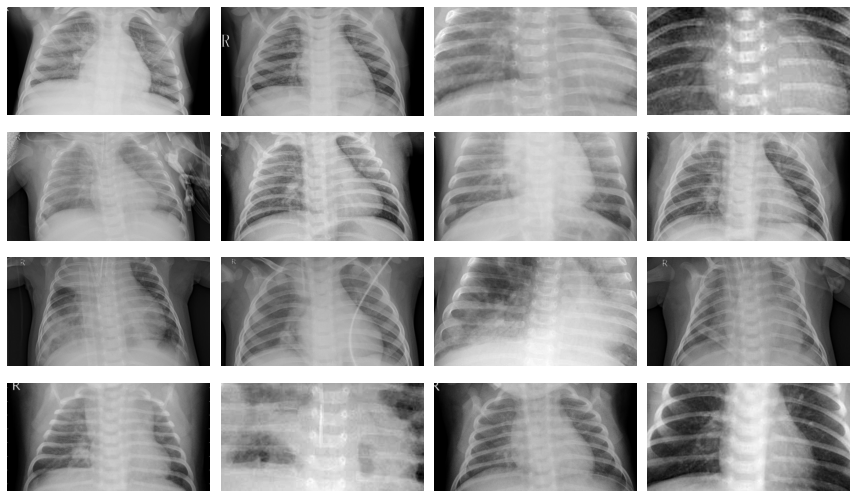

In [17]:
OFFS = 0
imgs = [plt.imread(fname) for fname in train_ars_files[0][OFFS:OFFS+16]]
h.show_imgs_old(
    imgs, gray=True, scale=1.5, ar=0.6
)

### Test

(32, 4)

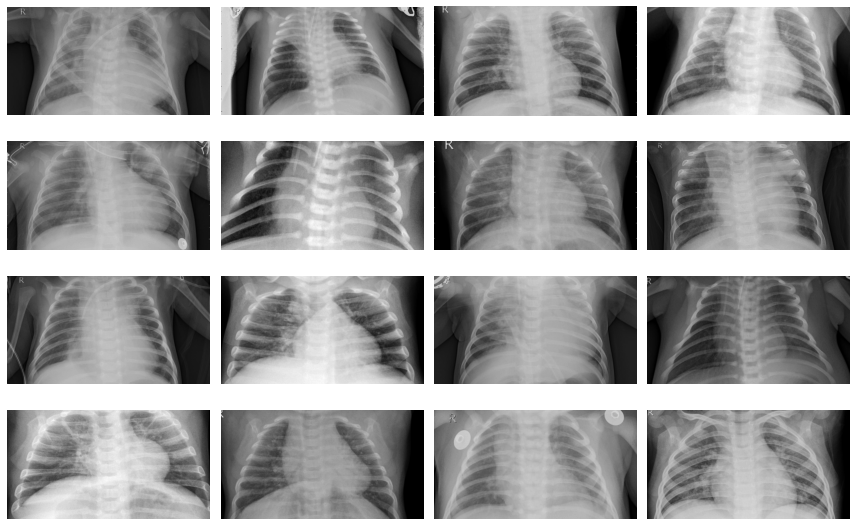

In [18]:
OFFS = 0
imgs = [plt.imread(fname) for fname in test_ars_files[0][OFFS:OFFS+16]]
h.show_imgs_old(
    imgs, gray=True, scale=1.5, ar=0.65
)
len(test_ars_files[0]), len(test_ars_files[1])

## Tall

### Train

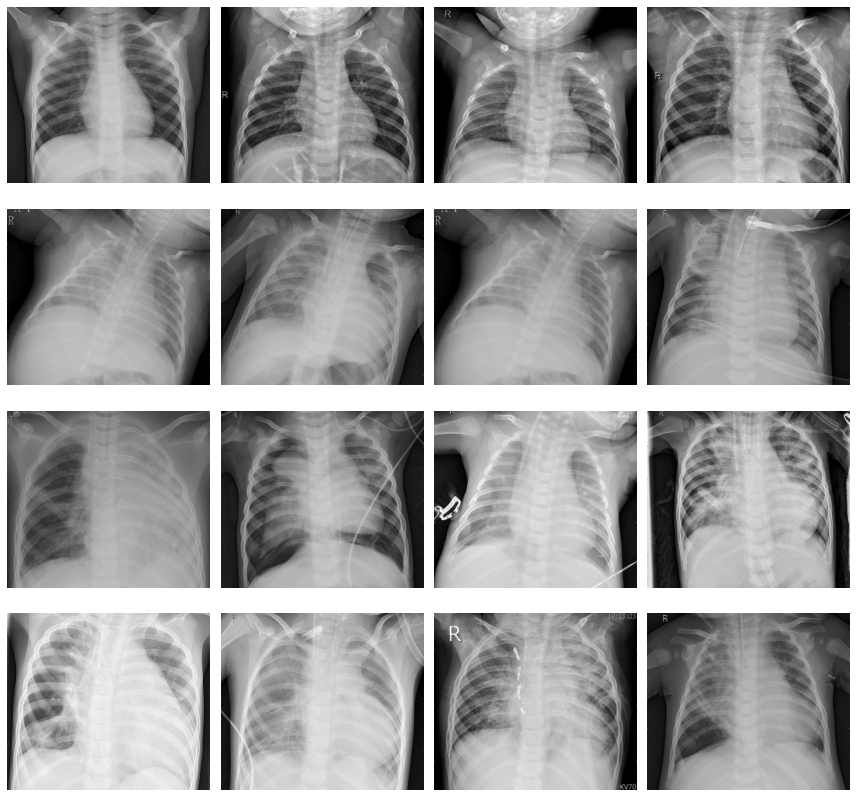

In [19]:
OFFS = 0
imgs = [plt.imread(fname) for fname in train_ars_files[1][OFFS:OFFS+16]]
h.show_imgs_old(
    imgs, gray=True, scale=1.5, ar=0.95
)

### Test

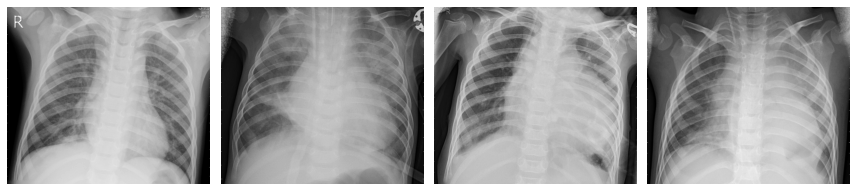

In [20]:
OFFS = 0
imgs = [plt.imread(fname) for fname in test_ars_files[1][OFFS:OFFS+16]]
h.show_imgs_old(
    imgs, gray=True, scale=1.5, ar=0.95
)